In [1]:
import numpy as np
import torch
import json

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
Ng= 256
file_path = '../isin-data/data_configs_a_neg_b_pos.json'

with open(file_path, 'r') as arquivo_json:
    dados = json.load(arquivo_json)

dados = dados[:100]
dados = np.array(dados, dtype=float)
dados = torch.from_numpy(dados)

dataset = []
for i in range(len(dados)):
  dataset.append(dados[i].view((Ng,Ng)))

dataset

FileNotFoundError: [Errno 2] No such file or directory: '../isin-data/data_configs_a_neg_b_pos.json'

In [21]:
len(dataset)

100

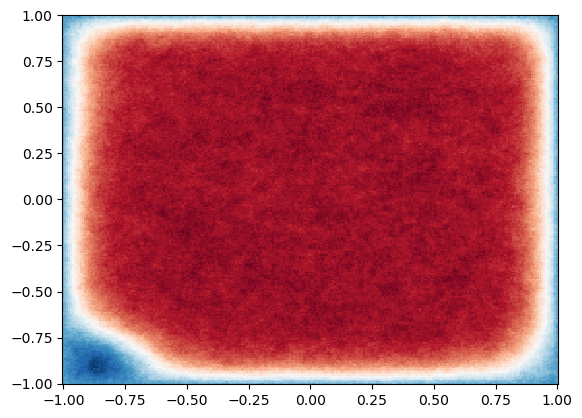

In [25]:
x = torch.linspace(-1, 1, Ng)
y = torch.linspace(-1, 1, Ng)
plt.pcolormesh(x,y,dataset[0], cmap=plt.cm.RdBu)

In [5]:
torch_matrix = dataset[0]

In [6]:
# Step 1: Convert torch matrix to NumPy array
numpy_array = torch_matrix.numpy()
numpy_array

array([[ 1.34722013e-02,  7.21771456e-03, -5.35513274e-02, ...,
        -2.04845015e-02, -2.23833770e-02,  2.85978634e-02],
       [ 9.91566665e-03,  2.11621393e-02, -1.82057661e-03, ...,
         2.34590024e-02,  2.17796490e-02, -2.46716011e-03],
       [-8.26842338e-03, -7.08359666e-03,  1.92289669e-02, ...,
        -1.90904066e-02, -1.31580951e-02,  9.69929970e-05],
       ...,
       [-3.78469527e-02, -4.09637019e-02, -3.42416391e-02, ...,
        -2.51424536e-02, -4.70376574e-02, -2.48424951e-02],
       [-9.27613303e-03, -1.42981736e-02, -1.01783350e-02, ...,
        -1.77799854e-02, -2.54084580e-02, -1.22927595e-03],
       [ 1.42252082e-02,  2.40462227e-03, -2.03196630e-02, ...,
        -2.71615125e-02, -2.49710195e-02, -3.59819345e-02]])

In [7]:
min_val = numpy_array.min()
max_val = numpy_array.max()
scaled_array = (255 * (numpy_array - min_val) / (max_val - min_val)).astype(np.uint8)
scaled_array

array([[137, 130,  62, ...,  99,  97, 154],
       [133, 145, 120, ..., 148, 146, 119],
       [113, 114, 143, ..., 100, 107, 122],
       ...,
       [ 79,  76,  83, ...,  94,  69,  94],
       [111, 106, 110, ..., 102,  93, 120],
       [138, 124,  99, ...,  91,  94,  81]], dtype=uint8)

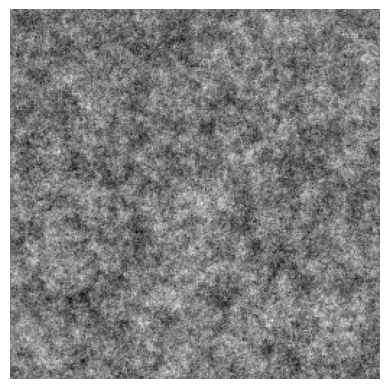

In [8]:
plt.imshow(scaled_array, cmap='gray')  # 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [ ]:
# Step 3: Convert NumPy array to PIL Image
image = Image.fromarray(scaled_array)

# Step 4: Save the image as a JPEG file
image.save('output.jpg')

## Apply transformation for every image

In [26]:
import os 

diretorio = "../isin-data/transformed/low_temp"
os.makedirs(diretorio, exist_ok=True)

for i in range(len(dataset)):
    numpy_array = dataset[i].numpy()
    min_val = numpy_array.min()
    max_val = numpy_array.max()
    scaled_array = (255 * (numpy_array - min_val) / (max_val - min_val)).astype(np.uint8)
    image = Image.fromarray(scaled_array)
    image.save(f'{diretorio}/img_transf_lt_{i}.jpg')

## Create training, test and validation directories

80%(72) for training, 10%(10) for test, 10%(18) for validation

In [2]:
import os
import shutil
import random

# Pasta raiz onde estão as pastas low e high
pasta_raiz = "../isin-data/transformed/"

# Pastas de origem (low e high)
pastas_origem = ["low_temp", "high_temp"]

# Nomes das pastas de destino (treino, teste, validacao)
pastas_destino = ["treino", "teste", "validacao"]

# Proporção de divisão (80% treino, 10% teste, 10% validação)
proporcoes = [0.72, 0.10, 0.18]

# Itera sobre as pastas de origem (low e high)
for pasta_origem in pastas_origem:
    pasta_origem_path = os.path.join(pasta_raiz, pasta_origem)

    # Itera sobre as pastas de destino (treino, teste, validacao)
    for pasta_destino in pastas_destino:
        pasta_destino_path = os.path.join(pasta_raiz, pasta_destino, pasta_origem)
        os.makedirs(pasta_destino_path, exist_ok=True)

        # Lista de arquivos na pasta de origem
        arquivos = os.listdir(pasta_origem_path)
        total_arquivos = len(arquivos)

        # Calcula quantos arquivos serão copiados para esta pasta de destino
        quantidade_arquivos = int(total_arquivos * proporcoes[pastas_destino.index(pasta_destino)])

        # Seleciona aleatoriamente os arquivos
        arquivos_selecionados = random.sample(arquivos, quantidade_arquivos)

        # Copia os arquivos selecionados para a pasta de destino
        for arquivo in arquivos_selecionados:
            caminho_arquivo_origem = os.path.join(pasta_origem_path, arquivo)
            caminho_arquivo_destino = os.path.join(pasta_destino_path, arquivo)
            shutil.copy(caminho_arquivo_origem, caminho_arquivo_destino)
            print(f"Arquivo '{arquivo}' copiado para '{pasta_destino}/{pasta_origem}'.")


Arquivo 'img_transf_lt_63.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_5.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_42.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_93.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_22.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_55.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_12.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_92.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_67.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_50.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_14.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_78.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_47.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_95.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_19.jpg' copiado para 'treino/low_temp'.
Arquivo 'img_transf_lt_52.jpg' copiado para 'treino/low_